## Imports

In [13]:
import neural_network as nn
import scipy.io
import numpy as np

%matplotlib inline

## Load and process training samples.

In [14]:
mat_data = scipy.io.loadmat('digits_data/hand_written_digits.mat')
X = mat_data['X']
y = mat_data['y']
augmented_matrix = np.append(X, y, axis=1)
np.random.shuffle(augmented_matrix)
X = augmented_matrix[:, :-1]
y = augmented_matrix[:, -1]

## Setup trainer

In [15]:
# Learning rate
alpha = 0.3
# Regularization
lamb = 50
# Random Theta rang
EPSILON_INIT = 0

digits_nn = nn.NeuralNetwork(X, y, alpha, lamb, EPSILON_INIT, 400, 400)

## Start training

In [16]:
digits_nn.train(iter_limit=0, time_limit=3600 * 5, grad_check=True, info_print_frequency=200, save_to_file=False)

Started training...
Started gradient checking...
Checking 100 randomly selected thetas...
Gradient check passed.
Used 18.29s for gradient checking.
--------------------------------------------------
Iter: 1, duration: 34.02s, J_train(θ): 7.923812241839385, J_cv(θ): 14.263435093183357, test set accuracy: 10.20%
Iter: 200, duration: 1404.45s, J_train(θ): 1.4701647135416667, J_cv(θ): 2.726004408115515, test set accuracy: 75.70%
Iter: 400, duration: 2743.77s, J_train(θ): 1.260557373046875, J_cv(θ): 2.8928634264187867, test set accuracy: 80.30%
Iter: 600, duration: 4082.92s, J_train(θ): 1.217321044921875, J_cv(θ): 2.917898103058877, test set accuracy: 81.30%
Iter: 800, duration: 5424.30s, J_train(θ): 1.1982218424479167, J_cv(θ): 2.9294841905782567, test set accuracy: 81.90%
Iter: 1000, duration: 6760.48s, J_train(θ): 1.187623291015625, J_cv(θ): 2.9343810520753144, test set accuracy: 82.00%
Iter: 1200, duration: 8099.69s, J_train(θ): 1.1788409016927084, J_cv(θ): 2.9290927332636367, test set 

## Print an example of prediction.

In [17]:
num_to_predict = 20
print('Expected:')
for ele in y[-num_to_predict:]:
    print('{0:2}'.format(int(ele)), end=' ')
print()
print('Prediction:')
for ele in digits_nn.predict(np.matrix(X[-num_to_predict:]))[0]:
    print('{0:2}'.format(int(ele)), end=' ')

Expected:
 6  4  1  2 10  2  2  4  7  5 10  8  2  7 10  5  5 10 10  9 
Prediction:
 6  4  1  2 10  2  2  4  7  5 10  8  2  1 10  3  5 10 10  9 

## Plot cost and accuracy graph.

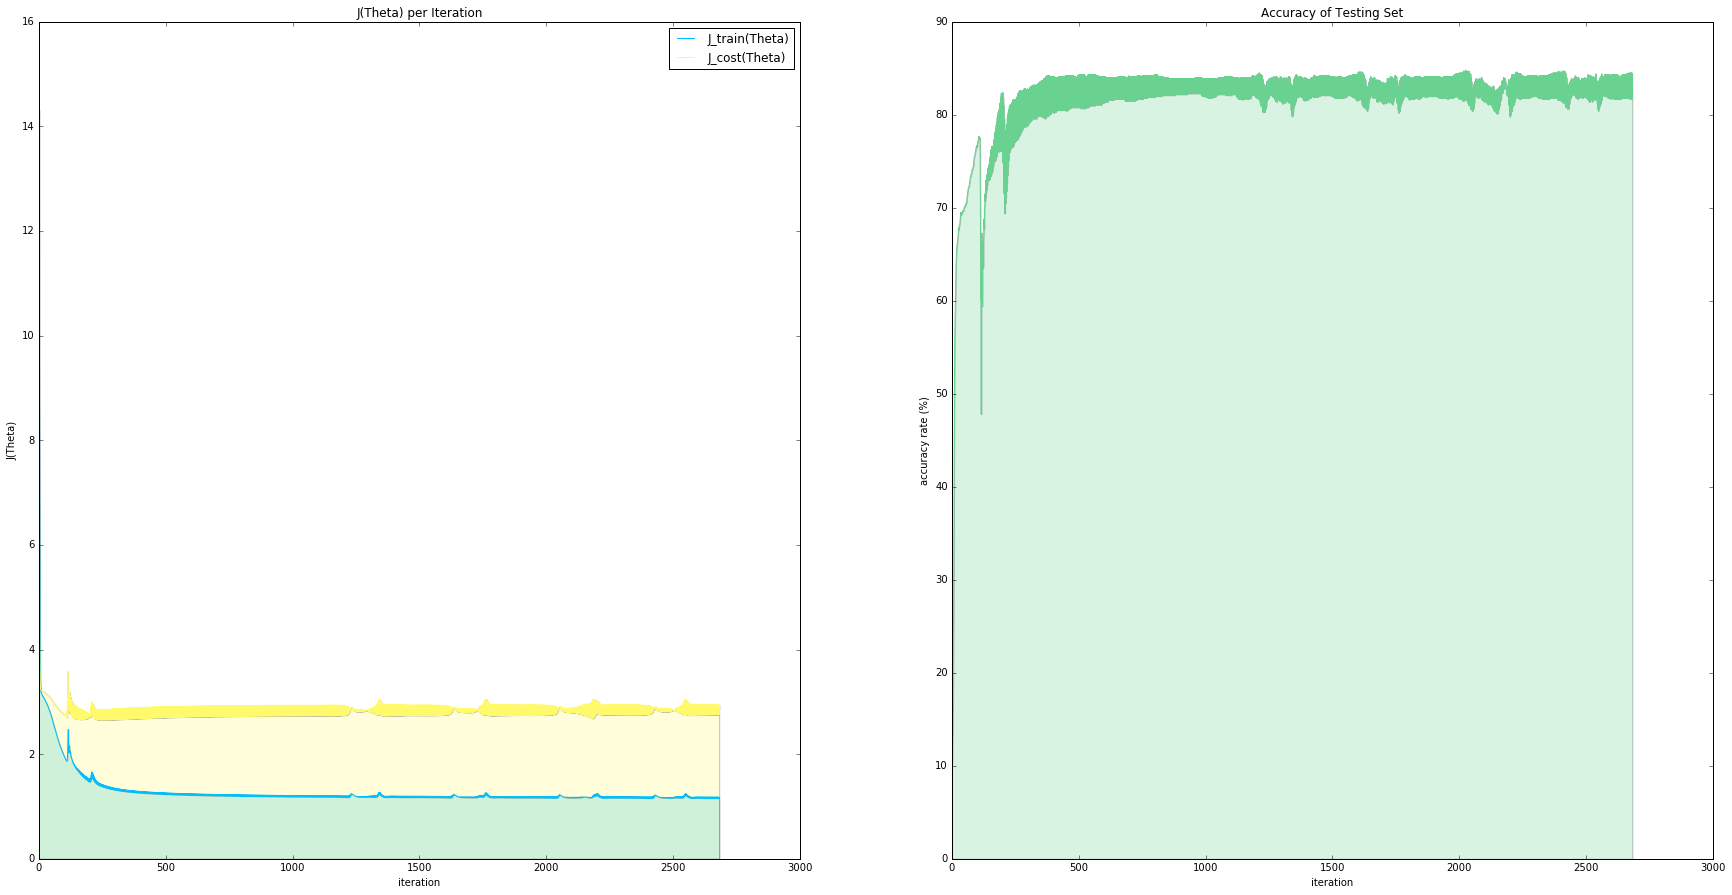

In [18]:
digits_nn.plot_training_info()
digits_nn.show_plot()

## Visualize Theta

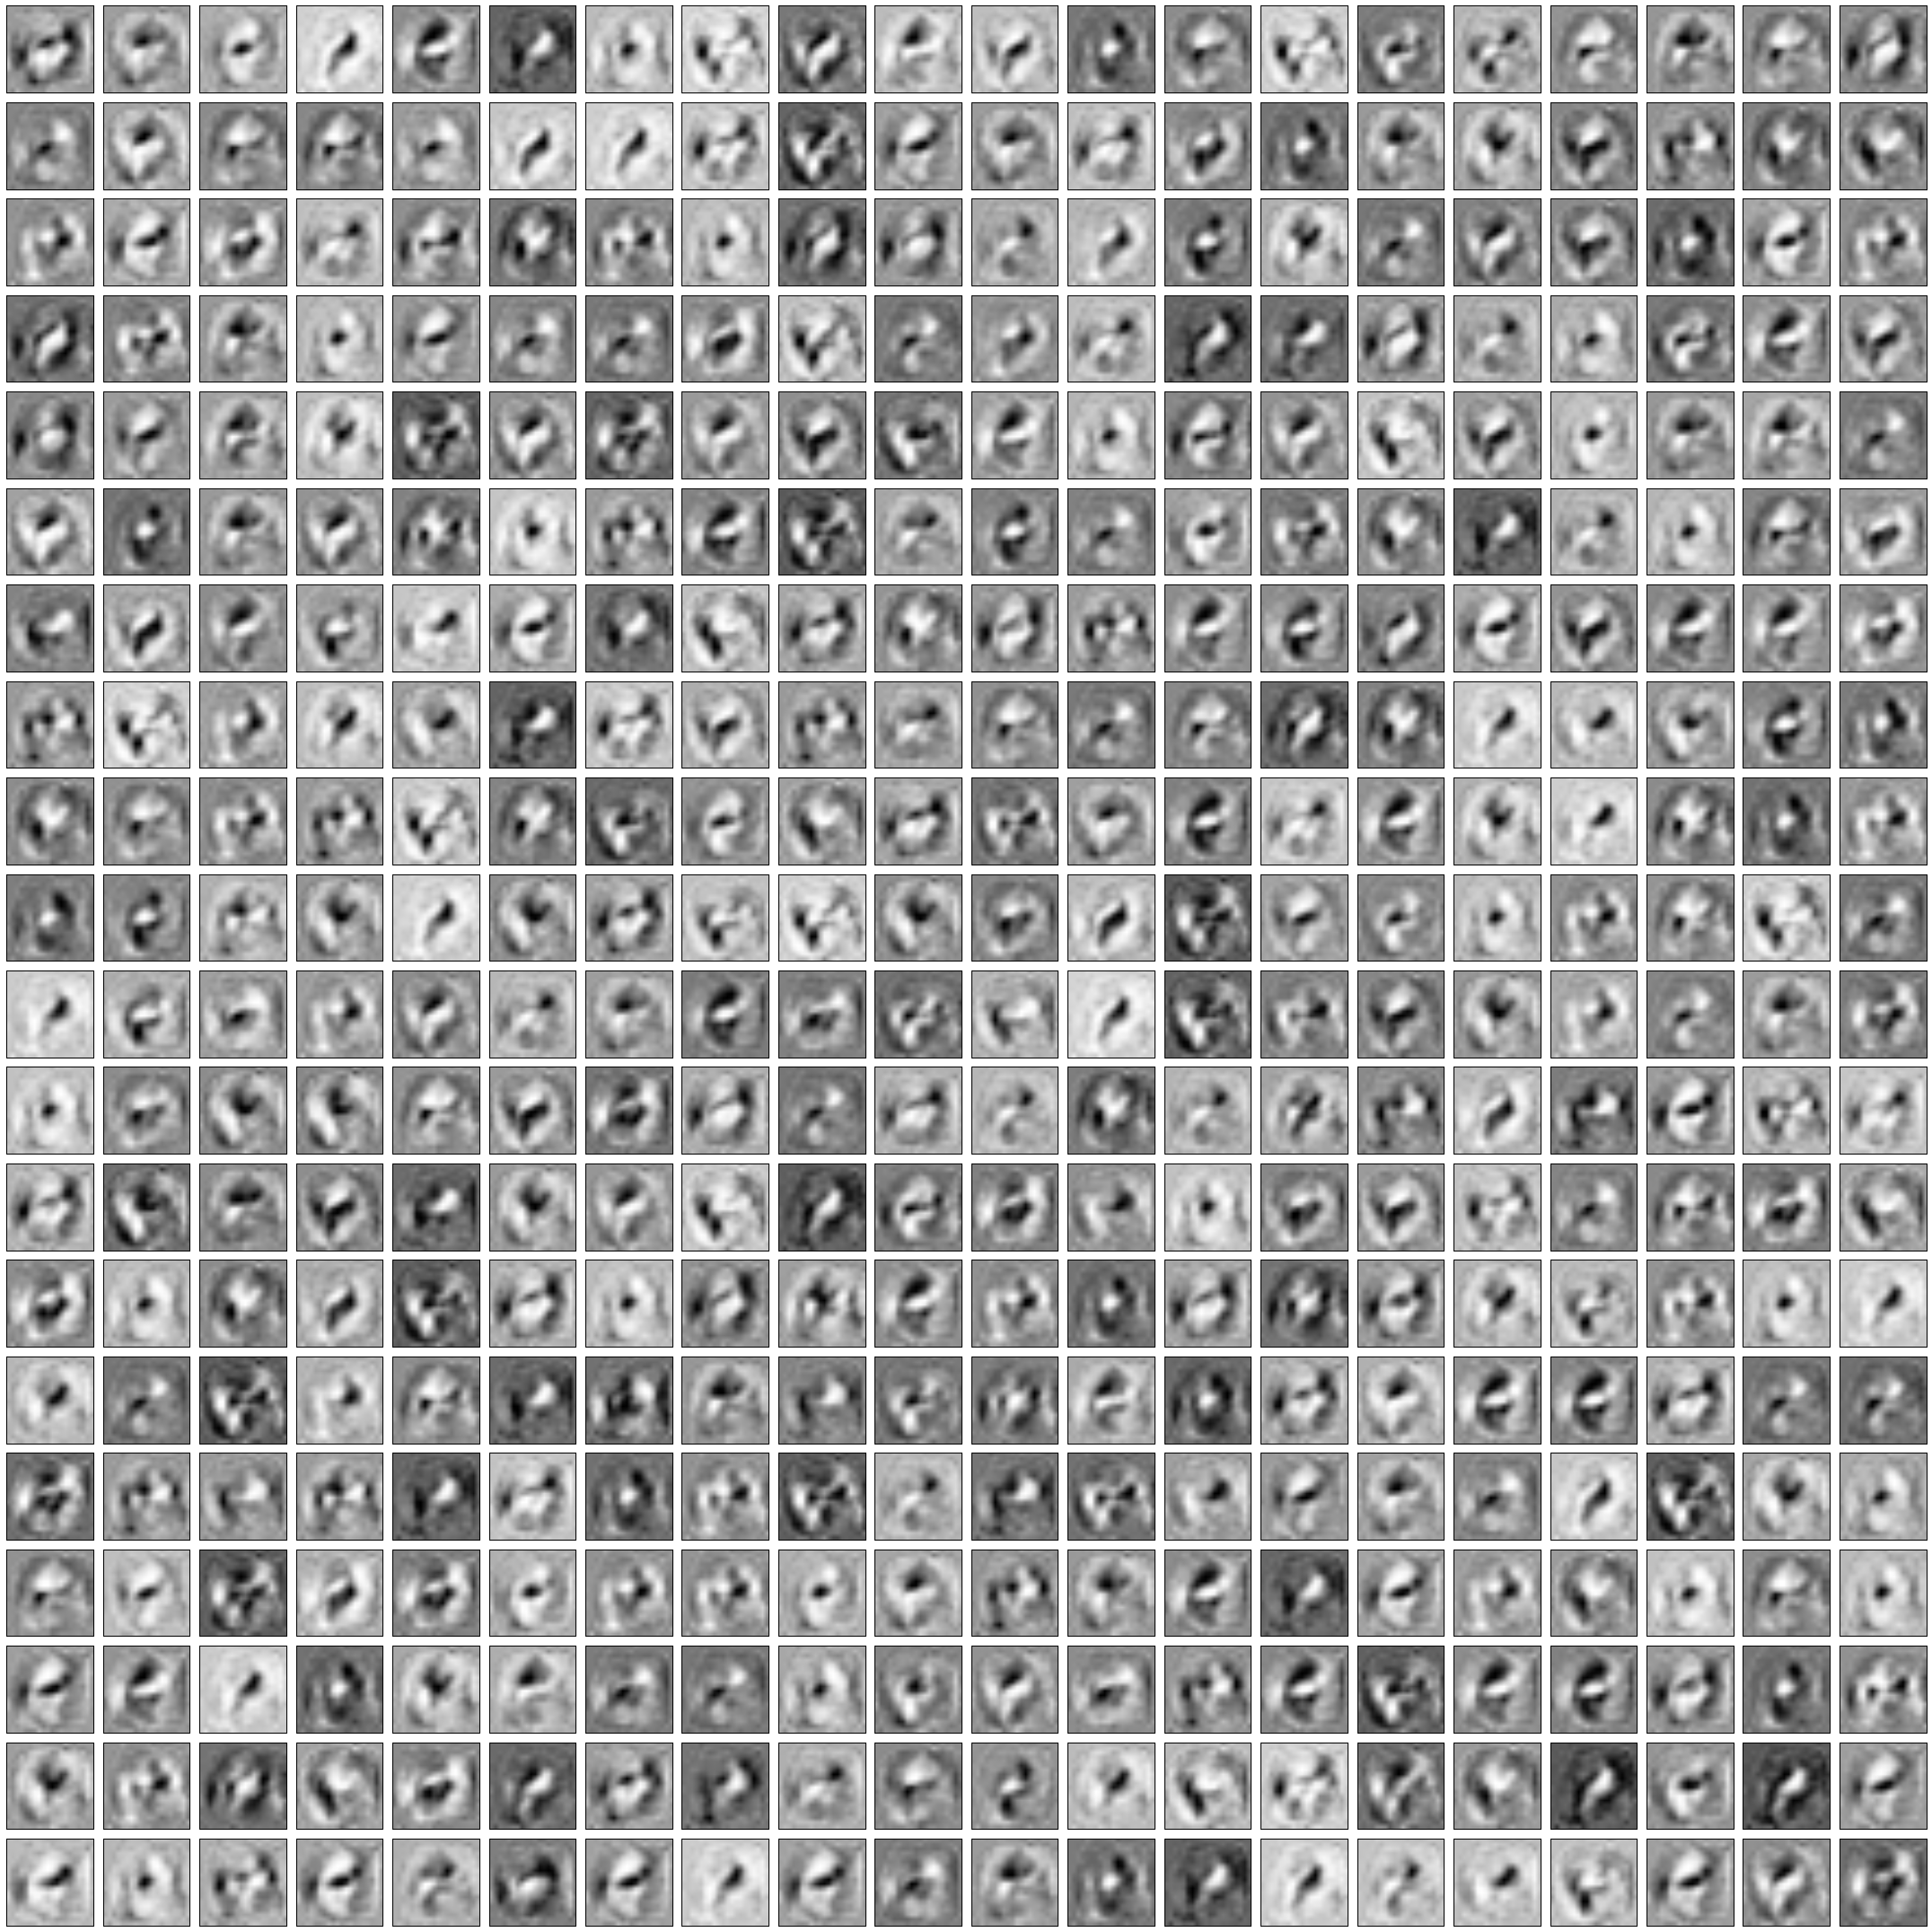

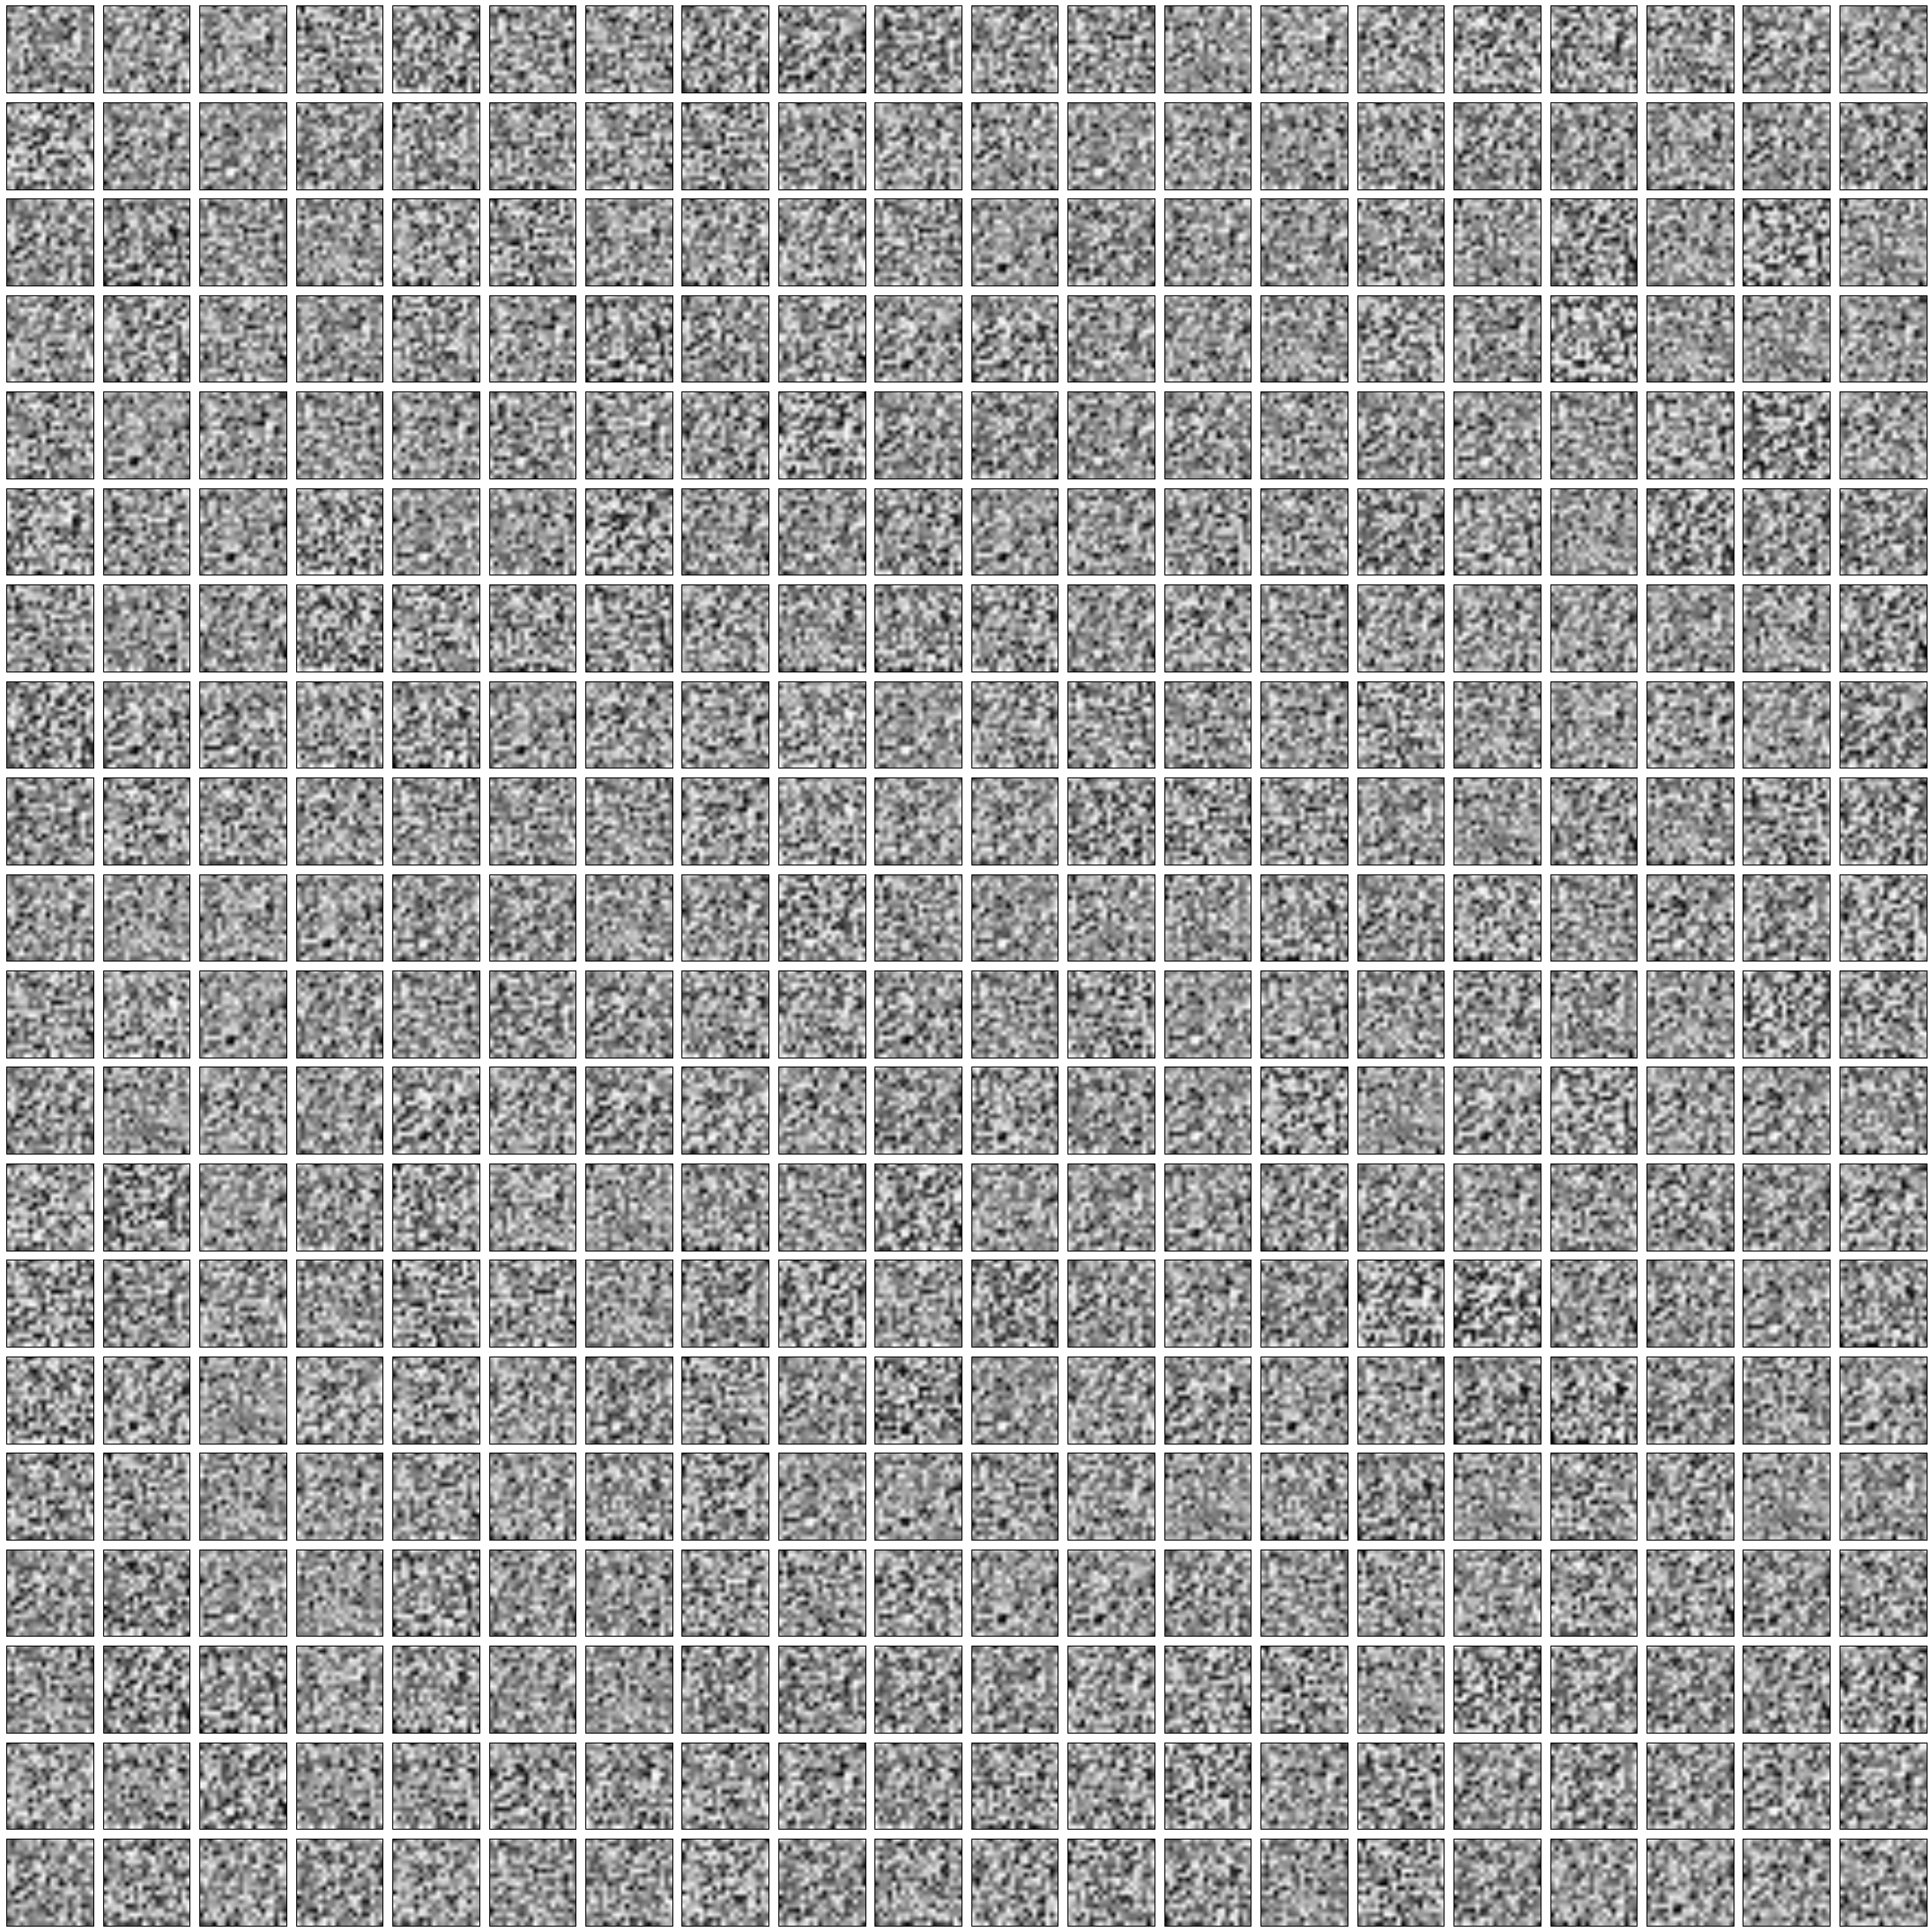

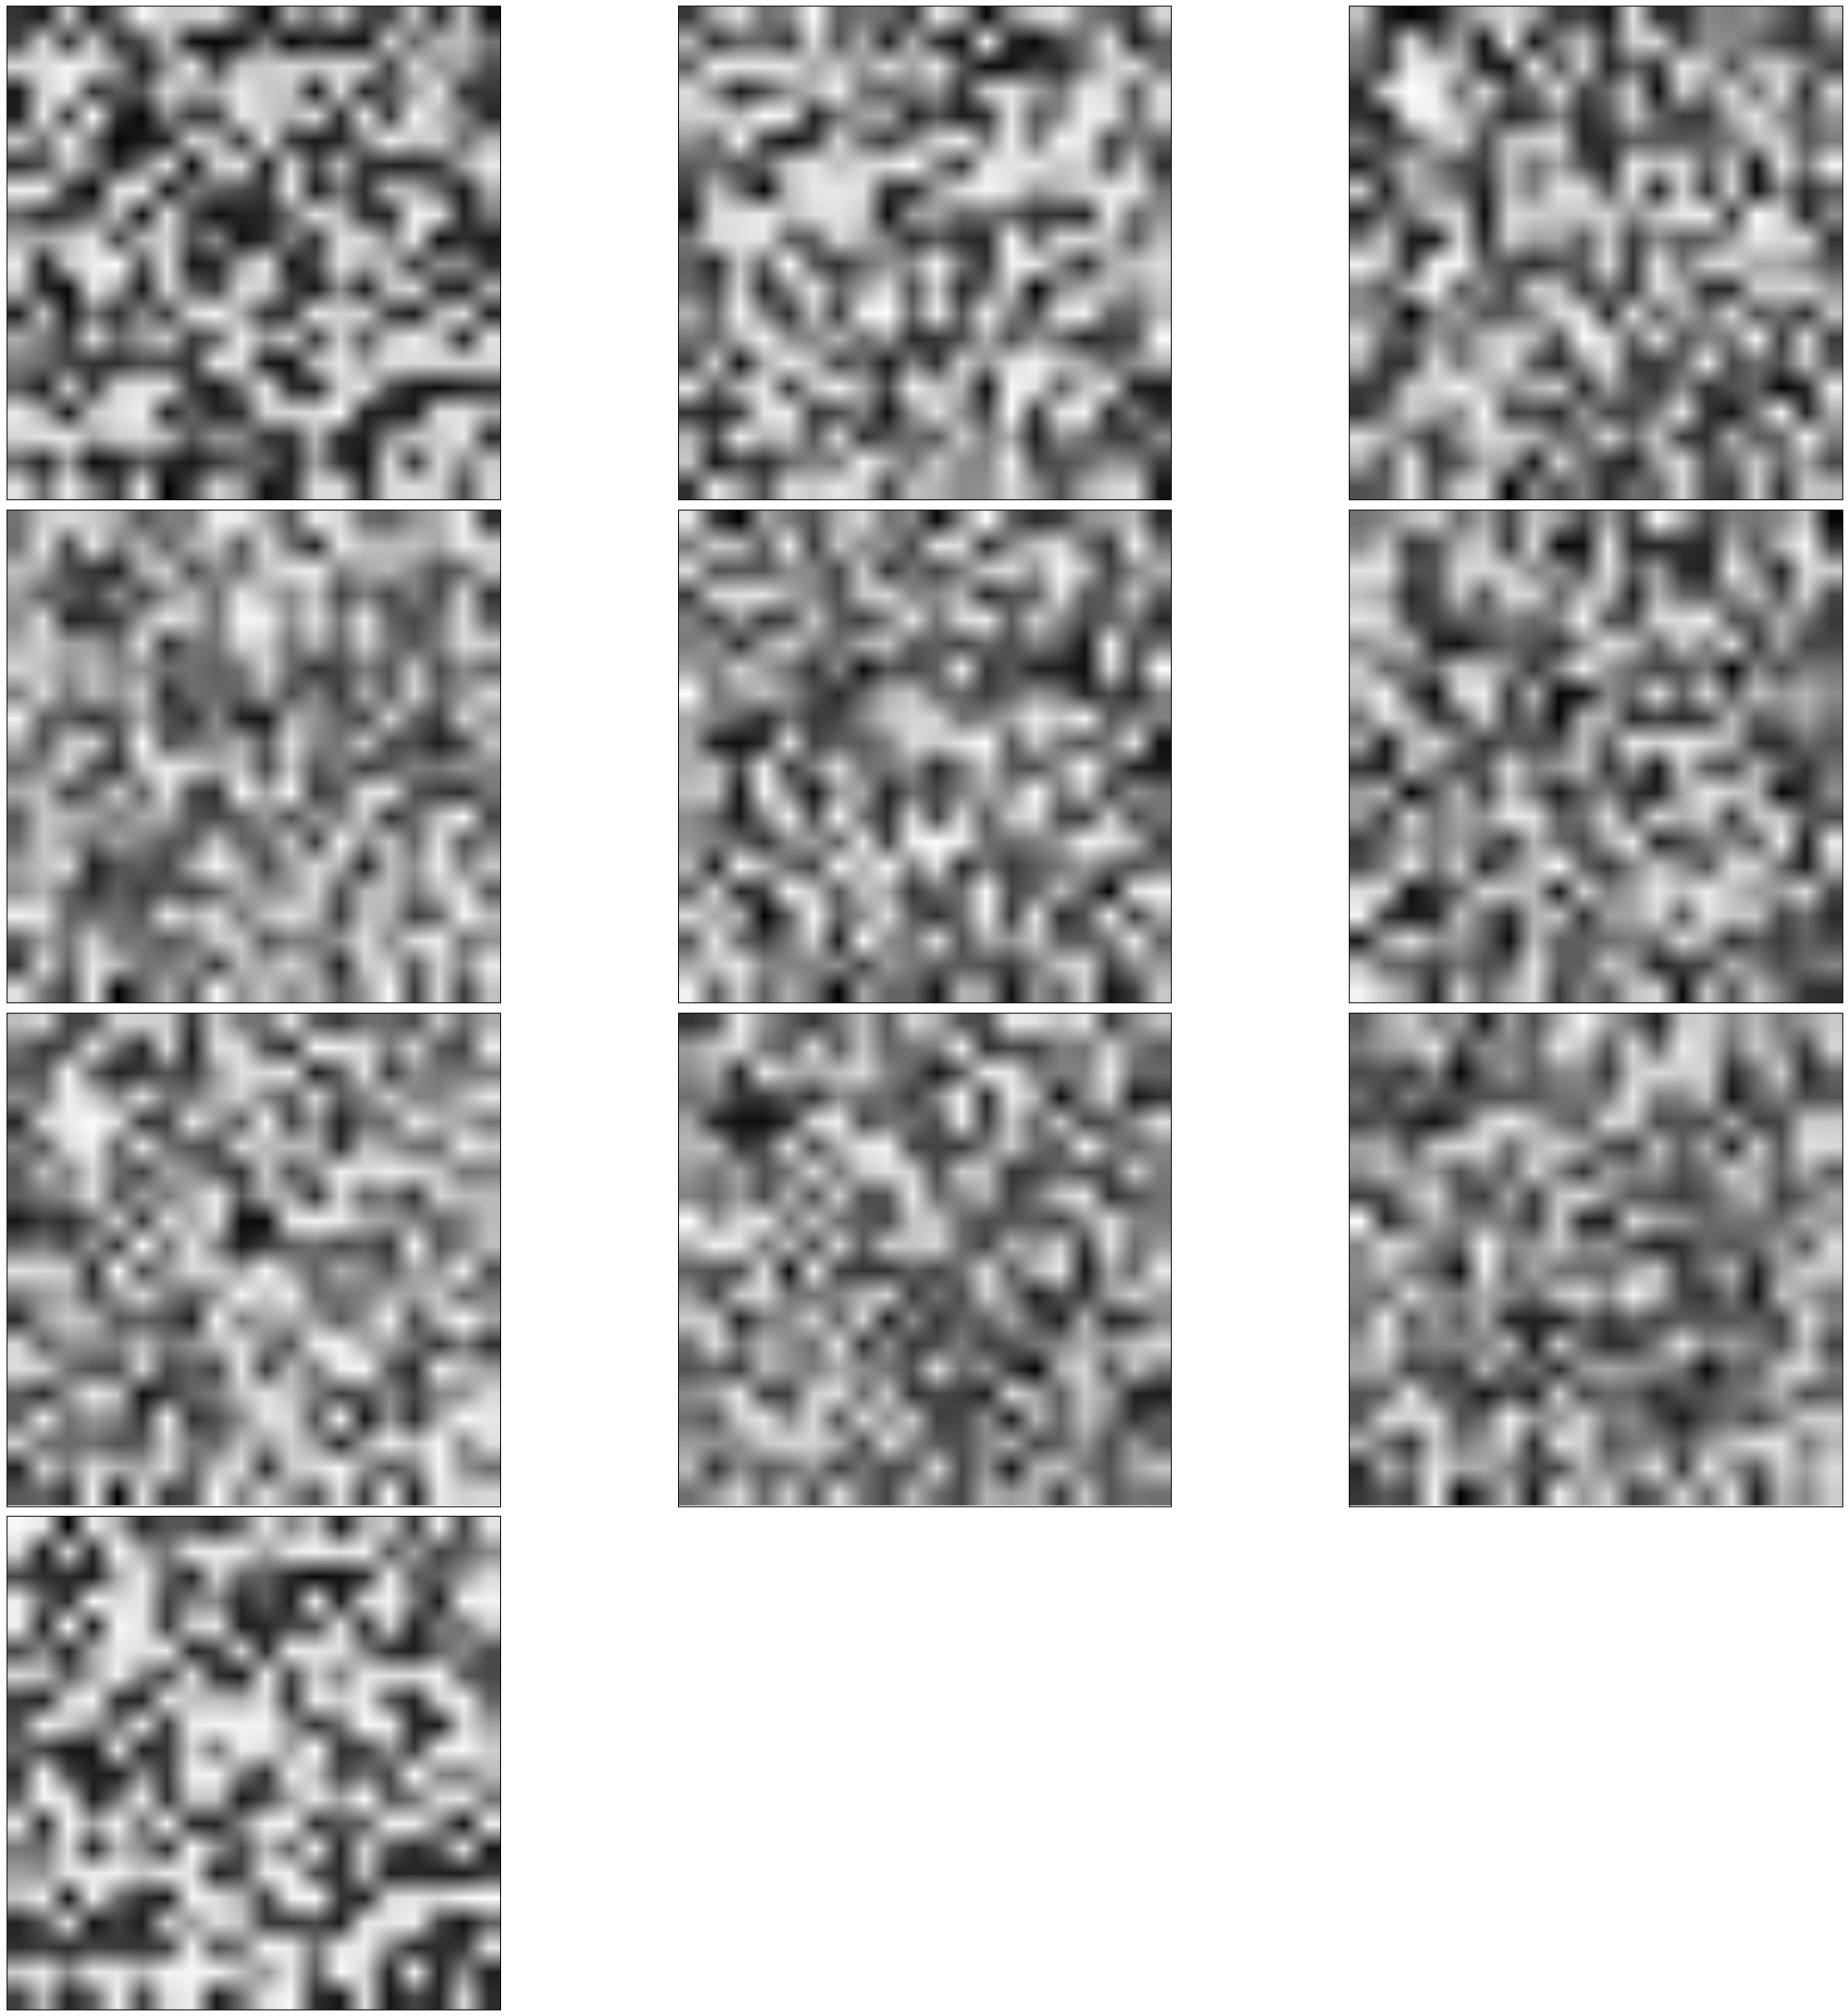

In [19]:
digits_nn.visualize_Theta(cmap='Greys_r')
digits_nn.show_plot()